In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['font.family'] = 'NanumGothic'
from sklearn.cluster import KMeans

In [2]:
path = r'C:\Users\EonKim\Desktop\github\khu seminar\subway\결과-201802\결과-20180209'
os.chdir(path)

In [3]:
os.listdir()

['20180209_Link인원(1시간 단위).csv',
 '20180209_시간대별 열차인원(10분 단위).csv',
 '20180209_시간대별 열차인원(1시간 단위).csv',
 '20180209_열차별이용인원.txt',
 '20180209_운행대수(10분 단위).csv',
 '20180209_운행대수(1시간 단위).csv',
 '20180209_혼잡도(10분 단위).csv',
 '20180209_혼잡도(1시간 단위).csv',
 '20180209_환승인원(10분 단위).csv',
 '20180209_환승인원(1시간 단위).csv',
 '20180209_환승인원_유형별(10분 단위).csv',
 '20180209_환승인원_유형별(1시간 단위).csv',
 'bar chart.png',
 'k-cluster.png',
 'k-cluster_time.png',
 '오류발생.txt']

In [4]:
file = r'20180209_시간대별 열차인원(10분 단위).csv'
population = pd.read_csv(file, encoding = 'cp949')

subway = population.iloc[:,2:].groupby('역명').sum()

population.dropna(inplace = True)

population['호선'] = population['호선'].astype('int64')

subway = population[population['호선'] <= 9].groupby('호선').sum().iloc[:,2:]


time = subway.corr(method= 'pearson')
hoseon = subway.T.corr(method = 'pearson')


In [5]:
time_rank = time.unstack().dropna().sort_values(ascending=False)
time_rank[time_rank != 1][:20].sort_index()

11:20 ~  11:50 ~    0.999694
         12:10 ~    0.999705
11:30 ~  14:30 ~    0.999756
11:50 ~  11:20 ~    0.999694
12:10 ~  11:20 ~    0.999705
13:10 ~  13:40 ~    0.999719
         14:10 ~    0.999694
         16:00 ~    0.999769
13:40 ~  13:10 ~    0.999719
         14:10 ~    0.999720
         16:00 ~    0.999694
14:10 ~  13:10 ~    0.999694
         13:40 ~    0.999720
14:30 ~  11:30 ~    0.999756
16:00 ~  13:10 ~    0.999769
         13:40 ~    0.999694
17:30 ~  17:40 ~    0.999746
17:40 ~  17:30 ~    0.999746
19:40 ~  20:00 ~    0.999886
20:00 ~  19:40 ~    0.999886
dtype: float64

In [6]:
hoseon_rank = hoseon.unstack().dropna().sort_values(ascending = False)
hoseon_rank[hoseon_rank != 1][:20].sort_index()

호선  호선
1   4     0.994439
2   3     0.992405
    9     0.991147
3   2     0.992405
    4     0.994474
4   1     0.994439
    3     0.994474
    6     0.991350
    9     0.990446
5   6     0.989681
    7     0.991615
    8     0.991604
6   4     0.991350
    5     0.989681
    7     0.992689
7   5     0.991615
    6     0.992689
8   5     0.991604
9   2     0.991147
    4     0.990446
dtype: float64

In [7]:
file = r'20180209_시간대별 열차인원(1시간 단위).csv'
population = pd.read_csv(file, encoding = 'cp949')

In [8]:
population.dropna(inplace = True)
population['호선'] = population['호선'].astype('int64')
hour = population[population['호선'] <= 9].groupby('호선').sum().iloc[:,2:]

In [9]:
hour = hour[hour != 0].dropna(axis = 1).corr().unstack().sort_values(ascending=False)

In [10]:
hour[hour != 1][:20]

15:00 ~  14:00 ~    0.999870
14:00 ~  15:00 ~    0.999870
16:00 ~  15:00 ~    0.999639
15:00 ~  16:00 ~    0.999639
14:00 ~  13:00 ~    0.999628
13:00 ~  14:00 ~    0.999628
         15:00 ~    0.999539
15:00 ~  13:00 ~    0.999539
16:00 ~  14:00 ~    0.999286
14:00 ~  16:00 ~    0.999286
11:00 ~  12:00 ~    0.999216
12:00 ~  11:00 ~    0.999216
21:00 ~  20:00 ~    0.999036
20:00 ~  21:00 ~    0.999036
         19:00 ~    0.998819
19:00 ~  20:00 ~    0.998819
         21:00 ~    0.998673
21:00 ~  19:00 ~    0.998673
13:00 ~  16:00 ~    0.998660
16:00 ~  13:00 ~    0.998660
dtype: float64

In [11]:
visual = population[population['호선'] <= 9].groupby('호선').sum().iloc[:,2:]

In [12]:
visual

,04:00 ~,05:00 ~,06:00 ~,07:00 ~,08:00 ~,09:00 ~,10:00 ~,11:00 ~,12:00 ~,13:00 ~,...,18:00 ~,19:00 ~,20:00 ~,21:00 ~,22:00 ~,23:00 ~,00:00 ~,01:00 ~,02:00 ~,03:00 ~
호선,,,,,,,,,,,,,,,,,,,,,
1,0,154154,411383,1125733,1580019,859654,648275,620123,660743,703488,...,1552721,1205817,715655,641441,605278,434461,78966,25,0,0
2,0,130246,429551,1316709,2505217,1449408,832076,759704,800475,909172,...,2549054,1866933,1055370,978593,988306,672254,206738,2412,0,0
3,0,55041,250644,738748,1256737,708059,471068,438790,438461,486240,...,1244591,888360,515135,435512,422023,260033,75546,186,0,0
4,0,87849,358457,969827,1474543,787799,558134,504730,518556,562284,...,1443065,1084802,626471,561981,539507,370852,120453,423,0,0
5,0,58537,242059,739711,1236794,529537,340724,310325,317267,353233,...,1061381,720531,393313,345990,341669,222409,69893,64,0,0
6,0,37978,127136,371102,637578,317390,205519,180664,190223,211483,...,553828,433753,248247,220934,235573,185839,57894,252,0,0
7,0,92079,323212,933204,1540094,799404,458506,389027,401281,426243,...,1231858,1007354,578444,511914,477072,323365,114231,388,0,0
8,0,17271,55570,158662,298356,141351,91846,81470,87647,92191,...,248915,174440,100710,85514,84857,50401,15792,182,0,0
9,0,24122,106114,329917,538289,284102,173518,159180,163111,188355,...,581674,441016,232755,197783,192853,130745,44451,172,0,0


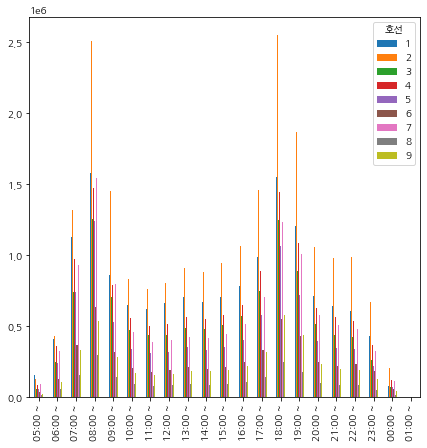

In [13]:
visual.iloc[:,1:-2].T.plot(kind = 'bar', figsize = (7, 7))
plt.savefig('bar chart.png')
plt.show()

In [14]:
km = KMeans(n_clusters = 3, random_state = 42).fit(visual.iloc[:,1:-3])

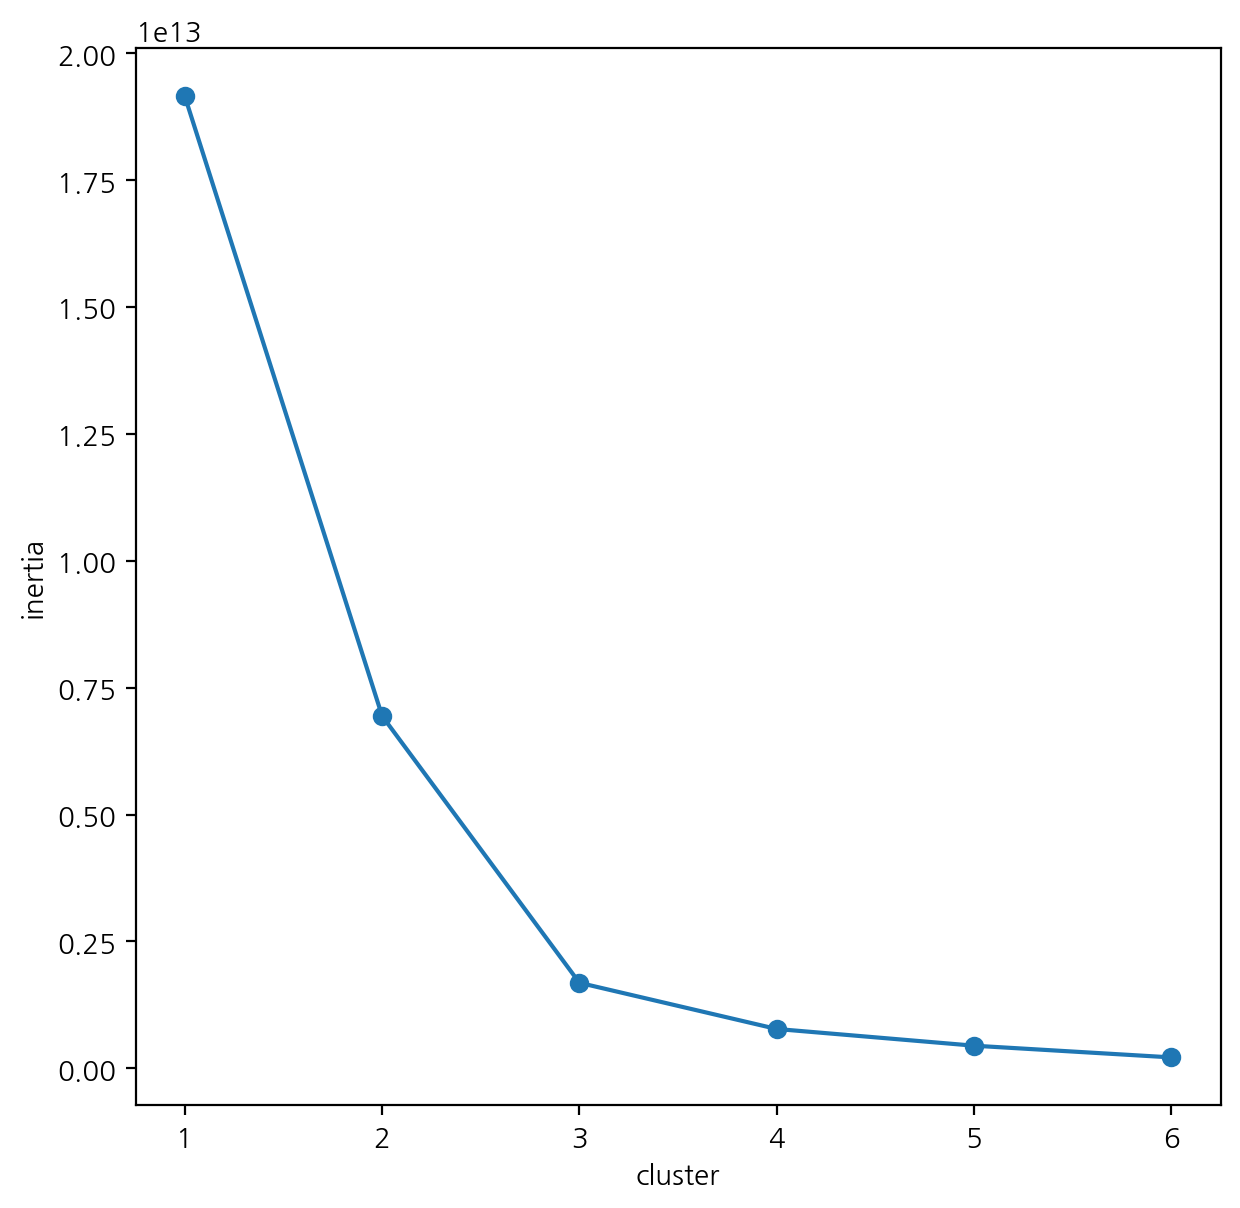

In [15]:
inertia = []
for i in range(1, 7):
    km = KMeans(n_clusters = i,init='k-means++', random_state = 42).fit(visual.iloc[:,1:-3])
    inertia.append(km.inertia_)
plt.figure(figsize = (7, 7), dpi = 200)
plt.plot(range(1, 7), inertia, marker = 'o')
plt.xlabel('cluster')
plt.ylabel('inertia')
plt.savefig('k-cluster.png')
plt.show()

In [16]:
df = visual.iloc[:,1:-3].T

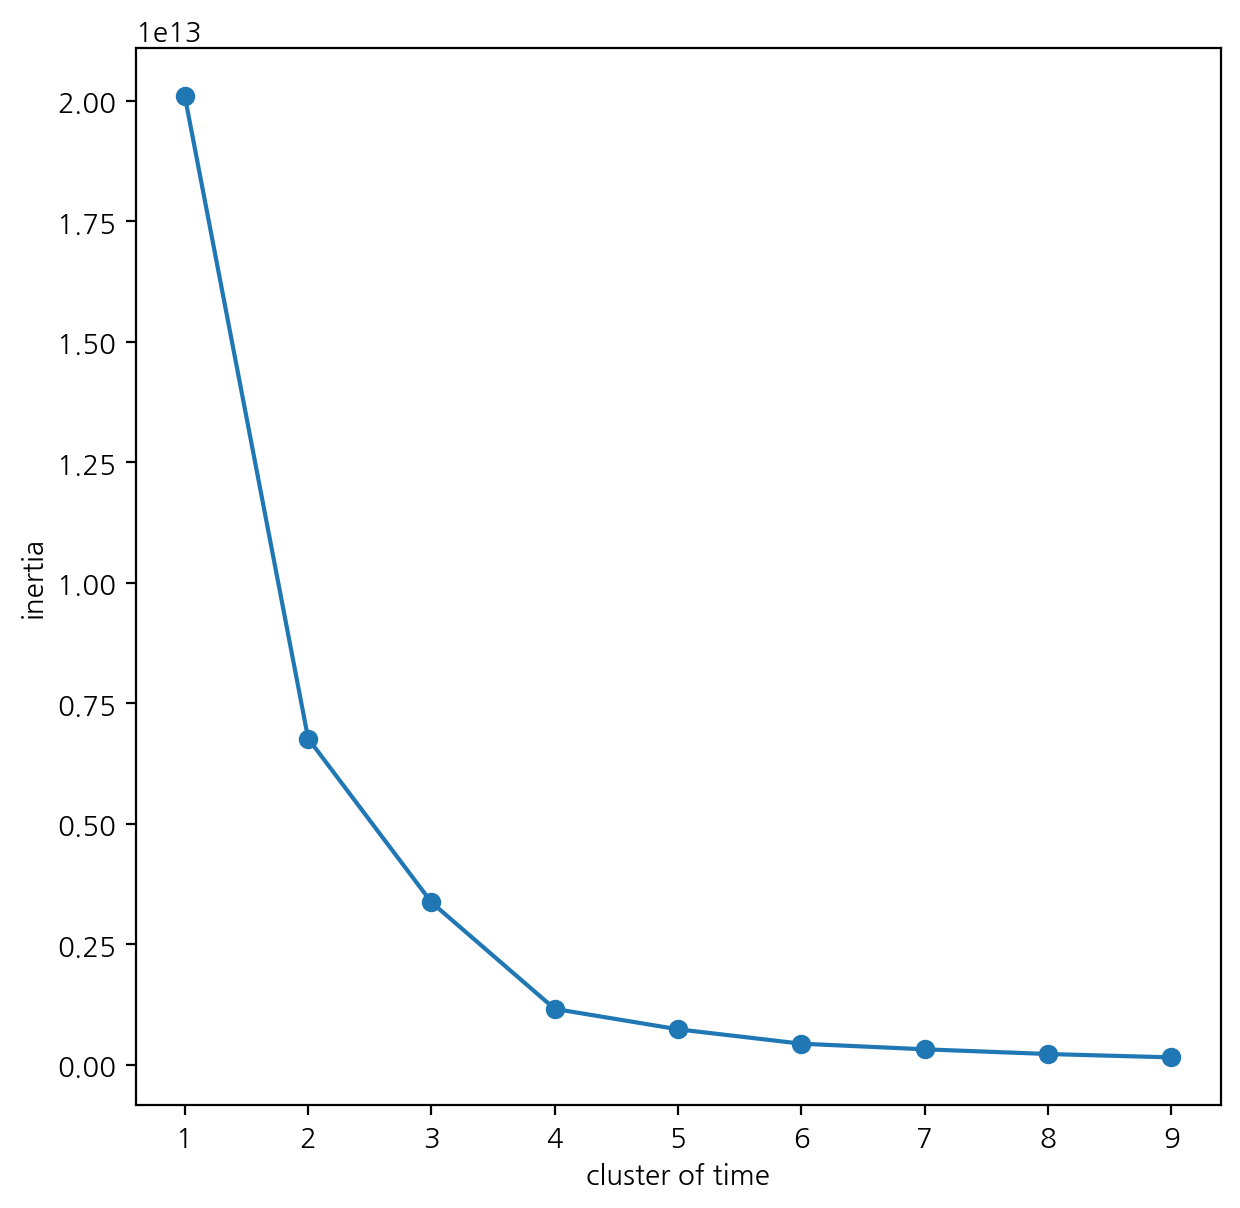

In [17]:
inertia = []
for i in range(1, 10):
    km_time = KMeans(n_clusters = i, init = 'k-means++', random_state = 42).fit(df)
    inertia.append(km_time.inertia_)
plt.figure(figsize = (7, 7), dpi = 200)
plt.plot(range(1, 10), inertia, marker = 'o')
plt.xlabel('cluster of time')
plt.ylabel('inertia')
plt.savefig('k-cluster_time.png')
plt.show()

In [30]:
km_time = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42).fit(visual.iloc[:,1:-3].T)
km_time.labels_

array([1, 1, 0, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 2, 2, 2, 1, 1])

In [29]:
visual.iloc[:,1:-3].T

호선,1,2,3,4,5,6,7,8,9
05:00 ~,154154,130246,55041,87849,58537,37978,92079,17271,24122
06:00 ~,411383,429551,250644,358457,242059,127136,323212,55570,106114
07:00 ~,1125733,1316709,738748,969827,739711,371102,933204,158662,329917
08:00 ~,1580019,2505217,1256737,1474543,1236794,637578,1540094,298356,538289
09:00 ~,859654,1449408,708059,787799,529537,317390,799404,141351,284102
10:00 ~,648275,832076,471068,558134,340724,205519,458506,91846,173518
11:00 ~,620123,759704,438790,504730,310325,180664,389027,81470,159180
12:00 ~,660743,800475,438461,518556,317267,190223,401281,87647,163111
13:00 ~,703488,909172,486240,562284,353233,211483,426243,92191,188355
14:00 ~,672365,882830,482707,547366,333150,197770,417841,89895,183854


In [26]:
len(km_time.labels_)

20

In [19]:
visual['label'] = km.labels_

In [34]:
for i in range(4):
    print(visual[visual['label'] == i].index)

Int64Index([5], dtype='int64', name='호선')
Int64Index([2], dtype='int64', name='호선')
Int64Index([6, 9], dtype='int64', name='호선')
Int64Index([1, 4], dtype='int64', name='호선')


In [28]:
visual_time.shape

(21, 9)

In [31]:
visual_time = visual.iloc[:,1:-3].T
visual_time['label'] = km_time.labels_

In [35]:
for i in range(5):
    print(visual_time[visual_time['label'] == i].index)

Index(['07:00 ~', '09:00 ~', '17:00 ~', '19:00 ~'], dtype='object')
Index(['05:00 ~', '06:00 ~', '00:00 ~', '01:00 ~'], dtype='object')
Index(['10:00 ~', '11:00 ~', '12:00 ~', '13:00 ~', '14:00 ~', '15:00 ~',
       '16:00 ~', '20:00 ~', '21:00 ~', '22:00 ~', '23:00 ~'],
      dtype='object')
Index(['08:00 ~', '18:00 ~'], dtype='object')
Index([], dtype='object')


In [ ]:
visual_time = visual.iloc[:,1:-3].T
